## Lista de preguntas:

# PREGUNTA 1
 
Carga el conjunto de datos desde el modulo `sklearn.datasets` usando la función `load_iris`. Divide el conjunto de datos en conjuntos de entrenamiento y prueba usando `train_test_split`

In [1]:
# Tu solucion
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# PREGUNTA 2
Entrena y evalúa `sklearn.neighbors.KNeighborsClassifier`, `RandomForestClassifier` y `sklearn.linear_model_LogisticRegression`, en el conjunto de datos `iris`. ¿ Cómo es el desempeño de estos modelos en el conjunto de entrenamiento y el conjunto de pruebas?, ¿cuál es el mejor en el conjunto de entrenamiento, cuál es el mejor en el conjunto de pruebas?.

### KNeighborsClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9811320754716981


In [4]:
k_range= range (1,26)
scores=[]
for k in k_range :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

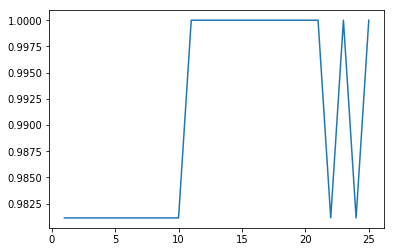

In [5]:
%matplotlib inline
plt.plot(k_range,scores)

### RandomForest

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9811320754716981


### LogisticRegression

In [7]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/home/bitzer/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bitzer/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [8]:
print(metrics.accuracy_score(y_test,y_pred))

0.9622641509433962


# PREGUNTA 3
¿Puedes construir un conjunto de datos de clasificación binaria en el cual `sklearn.linear_model.LogisticRegression` alcanza una exactitud de `1`?. ¿Puedes construir un conjunto de datos de clasificación binaria en el cual se alcanza una exactitud de `0.5`?.

In [9]:
# Tu solucion

# PREGUNTA 4
Usa `GridSearchCV` para ajustar `n_neighbors` de `KNeighborsClassifier`

In [10]:
#Aplicando GridSearchCV a la dataset iris
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9666666666666668


In [11]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
#print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [12]:
print("Score :", grid.best_score_)
print("Mejor Parametro : ",grid.best_params_['n_neighbors'])
print(grid.best_estimator_)

Score : 0.98
Mejor Parametro :  13
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


# PREGUNTA 5
Aplica un árbol de decisión al conjunto de datos `adult` y visualizalo.

Ajusta los paramétros con `grid-search`; prueba con `max_leaf_nodes` y `max_depth`, pero por separado.

Visualiza el árbol resultante y estas características de importancia.

In [13]:
# Tu solucion
import pandas as pd
df = pd.read_csv('adult.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Unnamed: 0        32561 non-null int64
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
df.head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
df = df.drop(['Unnamed: 0'], axis=1)

In [17]:
X = df.drop(columns = ['income'])
y = df.income

In [18]:
X_categoricas = pd.get_dummies(X.select_dtypes('object'))
X_non_categoricas = X.select_dtypes(exclude = 'object')

X = pd.concat([X_non_categoricas, X_categoricas], axis=1, join='inner')
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size  = 0.25)

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.05, min_samples_leaf = 0.001, max_features = None)
clf_gini = clf_gini.fit(train_data, train_label)
clf_gini_pred = clf_gini.predict(test_data)

In [20]:
print(metrics.accuracy_score(test_label,clf_gini_pred))

0.8580027023707161


In [21]:
from sklearn.tree import export_graphviz
from IPython.display import SVG

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

# PREGUNTA 6
Usa `GradientBoostingRegressor` sobre el conjunto de datos `Bike`. Busca `learning_rate` y `max_depth` usando `GridSearchCV`. ¿ Qué ocurre si se cambia `n_estimators`?

In [ ]:
# Tu solucion

# PREGUNTA 7
Carga el conjunto de datos `bank-campaign.csv`. Este conjunto de datos es el éxito de la comercialización de una campaña de marketing de banca telefónica. El objetivo es predecir el objetivo el resultado binario de que si un cliente se suscribió a un nuevo producto.

Divide los datos  en conjuntos de entrenamiento y pruebas usando `train_test_split`. Usa `cross-validation` para evaluar un clasificador de bosques aleatorios `RandomForestClassifier` en la parte de entrenamiento. Entonces usa `GridSearchCV` para ajustar los paramétros `max_features` y `max_depth`. Crea un mapa de calor con los resultados de la validación cruzada para todo el  grid.

Dibuja la influencia del `max_depth` en tiempo de ejecución.

In [ ]:
# Tu solucion

# PREGUNTA 8
Carga el conjunto de datos `adult.csv`. Crea un pipeline usando `ColumnTransformer`, `OneHotEncoder`, `Scaling`, `polynomial features` y un `linear classifier`.

Encuentra las mejores opciones para `polynomial features` junto con la regularización de un modelo lineal.

In [ ]:
# Tu solucion


# PREGUNTA 9
Carga el conjunto de datos `adult` y realiza una división  en conjunto de entrenamiento y prueba. Aplica `grid-search` al conjunto de entrenamiento, buscando el mejor `C` para una regresión logística usando AUC. Dibuja la curva ROC y la curva precision-recall sobre el mejor modelo del conjunto de pruebas. 

In [ ]:
# Tu solucion

# PREGUNTA 10
Compara la velocidad  y exactitud de `LogisticRegression`, `LinearSVC` y `SGDClassifier` en el conjunto de datos `bank campaign` y `adult`. Prueba con `LogisticRegression(solver='sag')`

In [ ]:
# Tu solucion
